# 1. Introduction

Dans ce projet, nous allons analyser les données des ventes d'une entreprise pour prédire les ventes futures. L'objectif est de comprendre les tendances des ventes passées et d'effectuer une prévision sur les 7 prochains jours ( dans le contexte et la temporalité du Dataset bien sur).

Nous allons procéder à une **analyse exploratoire des données** pour examiner les ventes par produit, région et segment, puis nous allons essayer de prédire les ventes futures.

Le dataset utilisé provient de **Kaggle** et contient des informations détaillées sur les commandes, les produits, les clients et les ventes.

# 2. Chargement des Données et Exploration Initiale

Dans cette étape, nous allons charger notre fichier CSV contenant les données des ventes et examiner les premières lignes du jeu de données pour nous assurer qu'il a été correctement importé.

L'objectif ici est de vérifier la structure des données, de nous assurer que toutes les colonnes nécessaires sont présentes, et d'obtenir un aperçu des données avant de commencer l'analyse approfondie.

In [20]:
# Librairies pour la manipulation des données
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from prophet import Prophet

In [26]:
# Importation du fichier CSV
df = pd.read_csv('/Users/helton/Downloads/train 2.csv')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [34]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales
count,9800.000000,9800,9800,9800.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,55211.280918,230.769059
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,0.000000,0.444000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,23223.000000,17.248000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,57551.000000,54.490000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.605000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000
std,2829.160653,NaN,NaN,32076.677954,626.651875


# 3. Nettoyage des Données 

In [43]:
# Conversion des colonnes 'Order Date' et 'Ship Date' en format datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

# Remplir les valeurs manquantes dans 'Postal Code' (par 0)
df['Postal Code'] = df['Postal Code'].fillna(0)

# Vérification après les modifications
print(df.dtypes)
print(df.isnull().sum())

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


In [38]:
# Statistiques descriptives pour les colonnes numériques
df.describe()

# Visualisation des premières lignes du DataFrame après les traitements
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# 4. Analyse des Ventes par Produit par Région et par ville

Dans cette analyse, nous examinerons les ventes totales pour identifier les produits les plus populaires et les zones géographiques les plus rentables. Nous analyserons les revenus par catégorie, les 10 produits les plus vendus, les villes et états les plus rentables, les 10 clients les plus rentables, le mode de livraison le plus vendu, et enfin, les revenus par mode de livraison.


1. Revenus totales par Catégorie
2. Les 10 produits les plus Vendus
3. Les villes les plus Rentable
4. Les ventes totales par Etat
5. Les 10 clients les plus Rentables
6. Le mode de livraison le plus Vendu
7. Les Revenus par mode de Livraison


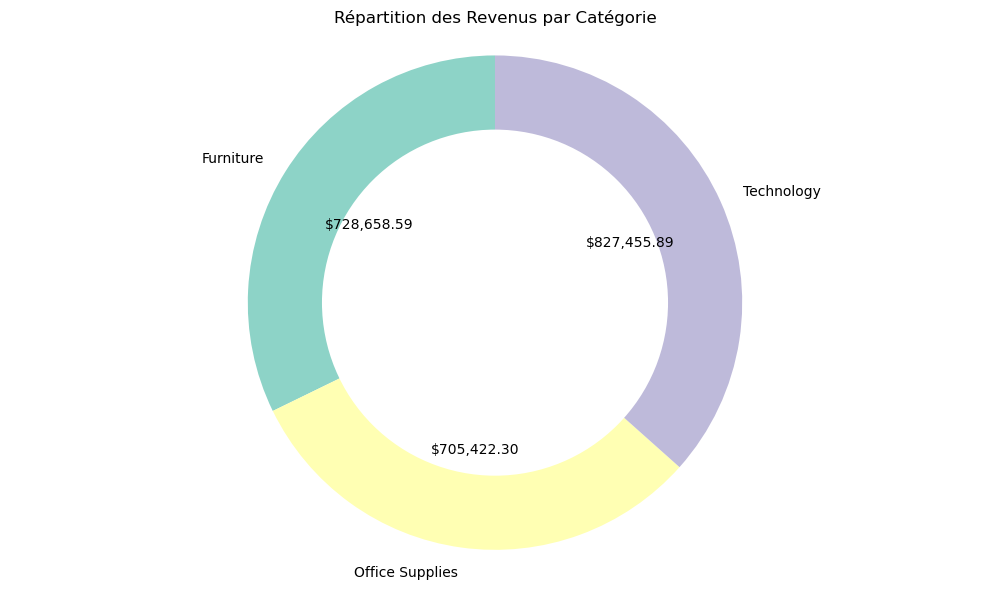

In [135]:
# Calcul des ventes totales par catégorie
ventes_par_categorie = df.groupby('Category')['Sales'].sum()

# Création du camembert
plt.figure(figsize=(10, 6))
plt.pie(ventes_par_categorie, 
        labels=ventes_par_categorie.index, 
        autopct=lambda p: f'${p * sum(ventes_par_categorie) / 100:,.2f}',  # Afficher les montants en argent
        startangle=90, 
        colors=sns.color_palette('Set3', len(ventes_par_categorie)))

# Ajouter un cercle blanc au centre pour améliorer l'apparence
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Titre et affichage
plt.title('Répartition des Revenus par Catégorie')
plt.axis('equal')  # Assurer que le graphique est un cercle
plt.tight_layout()
plt.show()

### On constate que la répartition est assez equilibré mais la technology est ce qui rapporte le plus

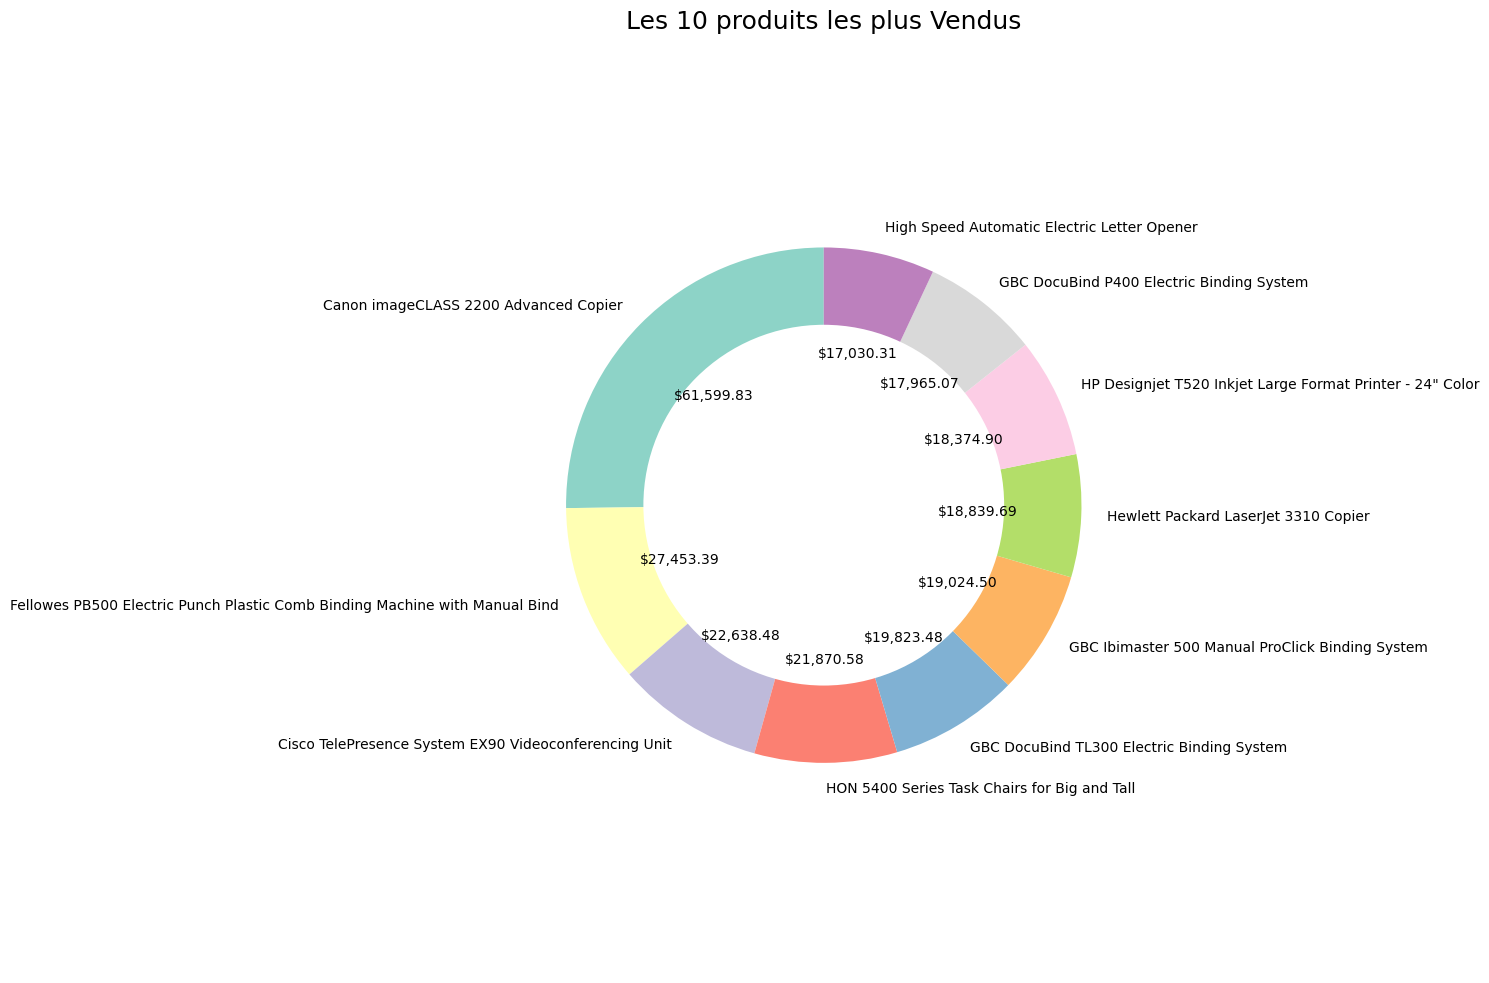

In [129]:
# Calcul des ventes totales par produit
ventes_par_produit = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

# Affichage du camembert (graphique en secteurs) avec les montants des ventes
plt.figure(figsize=(14, 10))  # Augmenter la taille du graphique
plt.pie(ventes_par_produit.head(10), 
        labels=ventes_par_produit.head(10).index, 
        autopct=lambda p: f'${p * sum(ventes_par_produit.head(10)) / 100:,.2f}', 
        startangle=90, 
        colors=sns.color_palette('Set3', 10))

# Ajouter un cercle au centre pour un effet de camembert
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Titre et ajustements
plt.title('Les 10 produits les plus Vendus', fontsize=18)
plt.axis('equal')  # Pour garantir que le graphique soit bien un cercle
plt.tight_layout()
plt.show()

### On peut voir que le produit le plus vendu est le  Canon imageCLASS 2200 Advanced Copier avec 61.600$

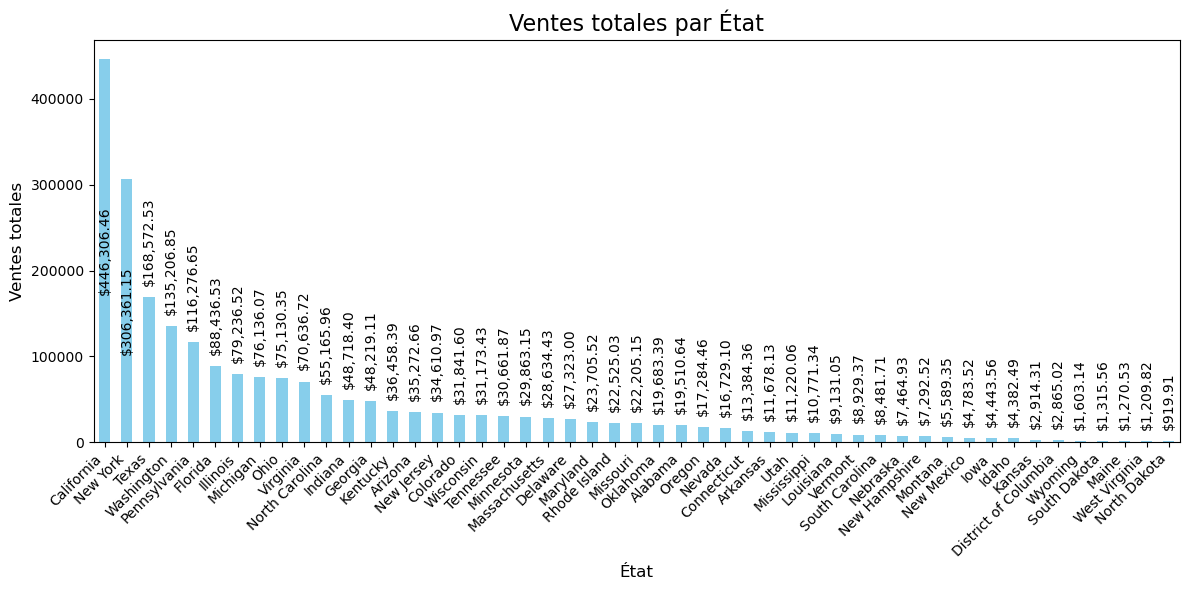

In [106]:
# Calcul des ventes totales par état
ventes_par_etat = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Calcul des ventes totales par état
ventes_par_etat = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Affichage des ventes par état avec la couleur 'skyblue'
plt.figure(figsize=(12,6))
ax = ventes_par_etat.plot(kind='bar', color='skyblue')

# Ajouter les chiffres au-dessus de chaque barre ou à l'intérieur de la barre
for i in ax.patches:
    height = i.get_height()
    x = i.get_x() + i.get_width() / 2.
    state = ventes_par_etat.index[int(i.get_x())]  # Identifier l'état par rapport à la barre
    
    # Si l'état est "California", afficher le montant à l'intérieur de la barre
    if state == "California":
        ax.annotate(f'${height:,.2f}', 
                    (x, height / 2),  # Positionner au centre de la barre
                    ha='center', va='center', 
                    fontsize=10, color='black',  # Texte en noir
                    rotation=90)
    else:
        ax.annotate(f'${height:,.2f}', 
                    (x, height),  # Positionner juste au-dessus de la barre
                    ha='center', va='bottom', 
                    fontsize=10, color='black',  # Texte en noir
                    xytext=(0, 8), textcoords='offset points',  # Décalage vers le haut
                    rotation=90)

# Titre et labels
plt.title('Ventes totales par État', fontsize=16)
plt.xlabel('État', fontsize=12)
plt.ylabel('Ventes totales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Les états rapportant le plus sont logiquement les plus gros tel que la californie et New York

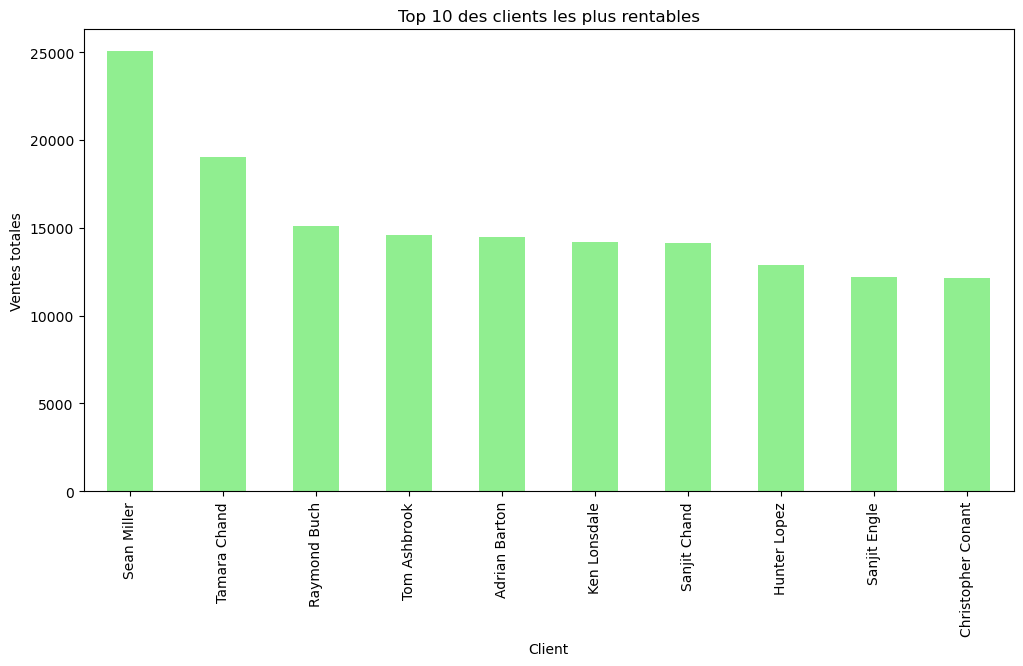

In [58]:
# Calcul des ventes totales par client
top_clients = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

# Affichage des 10 clients les plus rentables
top_clients.head(10).plot(kind='bar', figsize=(12,6), color='lightgreen')
plt.title('Top 10 des clients les plus rentables')
plt.xlabel('Client')
plt.ylabel('Ventes totales')
plt.xticks(rotation=90)
plt.show()

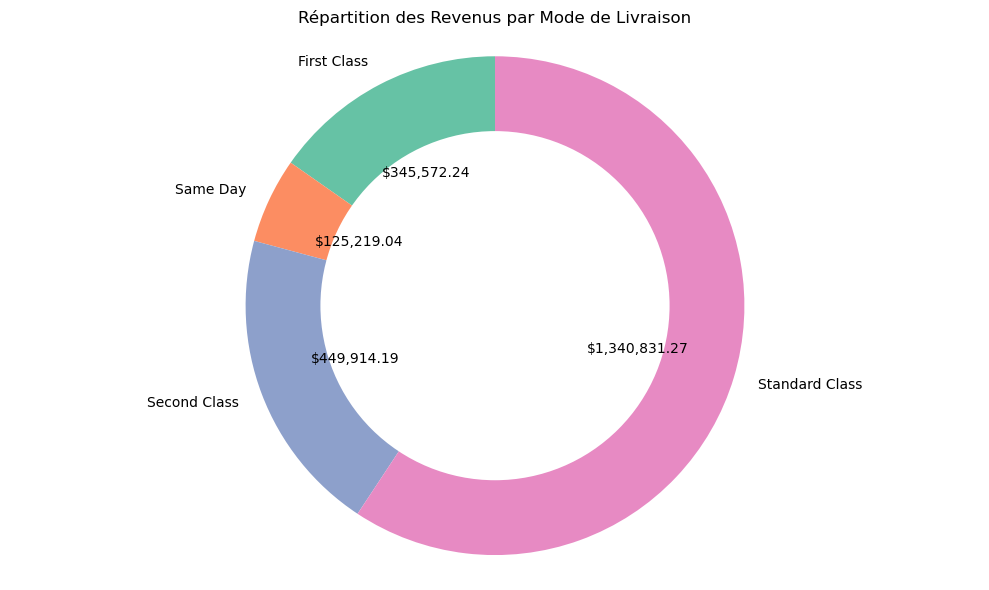

In [141]:
# Calcul des ventes totales par mode de livraison
ventes_par_ship_mode = df.groupby('Ship Mode')['Sales'].sum()

# Création du camembert pour les modes de livraison
plt.figure(figsize=(10, 6))
plt.pie(ventes_par_ship_mode, 
        labels=ventes_par_ship_mode.index, 
        autopct=lambda p: f'${p * sum(ventes_par_ship_mode) / 100:,.2f}',  # Afficher les montants en argent
        startangle=90, 
        colors=sns.color_palette('Set2', len(ventes_par_ship_mode)))

# Ajouter un cercle blanc au centre pour améliorer l'apparence
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Titre et ajustements
plt.title('Répartition des Revenus par Mode de Livraison')
plt.axis('equal')  # Assurer que le graphique est un cercle
plt.tight_layout()
plt.show()

### On voit clairement que le mode de livraison le plus choisis et qui rapporte le plus est la livraison standard avec ses 1 340 831$

# 5. Analyse de corrélation

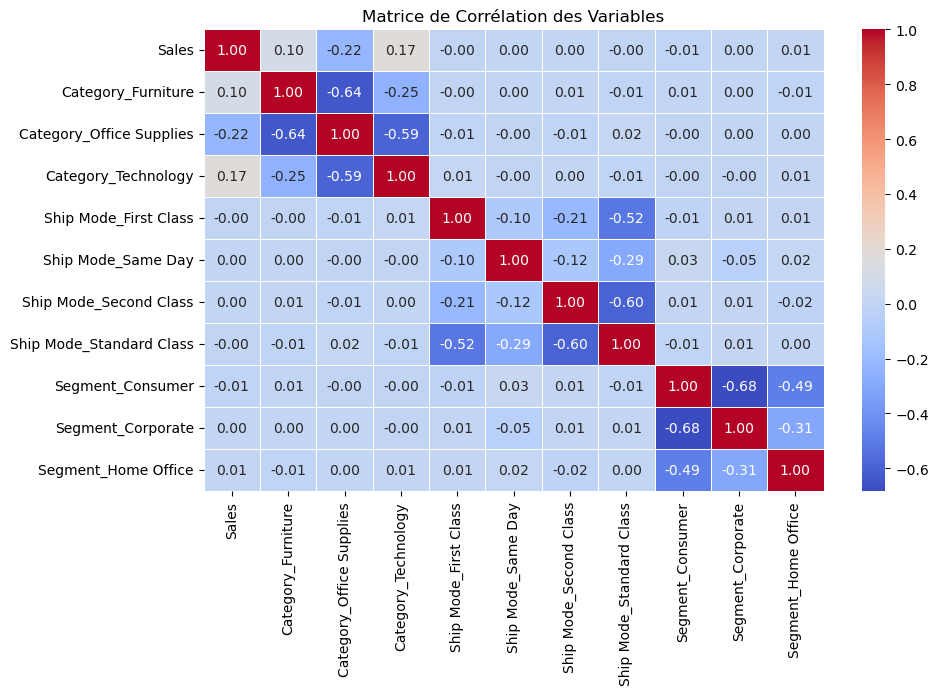

In [189]:
# Sélection des variables pertinentes pour la corrélation
df_corr = df[['Sales', 'Category', 'Ship Mode', 'Segment']]

# Convertir les variables catégorielles en variables numériques (encodage)
df_corr = pd.get_dummies(df_corr)

# Calcul de la matrice de corrélation
corr_matrix = df_corr.corr()

# Visualisation avec une heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Variables')
plt.show()

### Objectifs des trois analyses :
	1.	Corrélation entre les ventes et les segments de clients
	2.	Corrélation entre les ventes et les catégories de produits
	3.	Corrélation entre les ventes et les modes de livraison

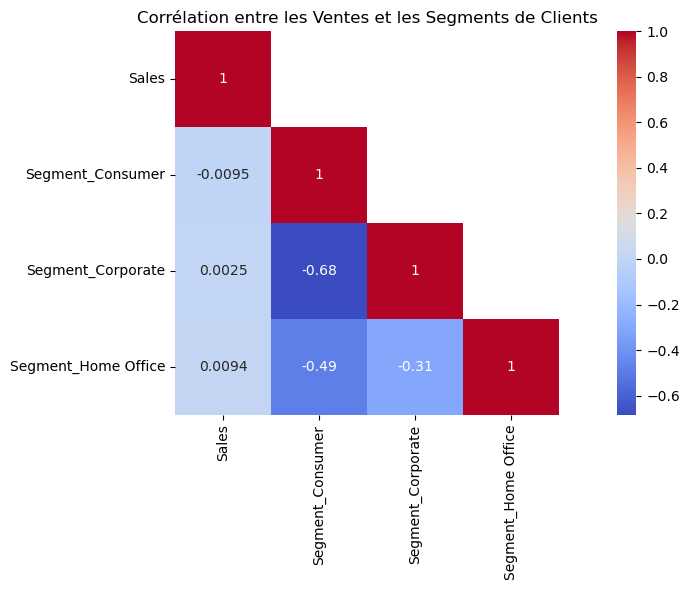

In [191]:
# Sélection des colonnes pertinentes pour la corrélation (Segment et Sales)
df1 = df[['Segment', 'Sales']]

# Convertir les variables catégorielles en variables numériques
df_cat = pd.get_dummies(df1)

# Calcul de la matrice de corrélation
cor_mat = df_cat.corr()

# Masquer la partie inférieure de la matrice pour ne pas dupliquer les informations
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False

# Visualisation de la corrélation avec une heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cmap='coolwarm', cbar=True)
plt.title('Corrélation entre les Ventes et les Segments de Clients')
plt.tight_layout()
plt.show()

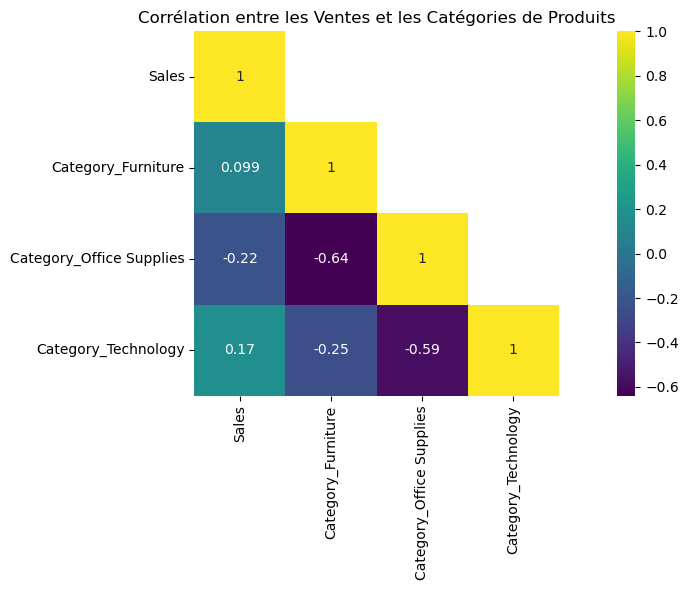

In [185]:
# Sélection des colonnes pertinentes pour la corrélation (Category et Sales)
df1 = df[['Category', 'Sales']]

# Convertir les variables catégorielles en variables numériques
df_cat = pd.get_dummies(df1)

# Calcul de la matrice de corrélation
cor_mat = df_cat.corr()

# Masquer la partie inférieure de la matrice
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False

# Visualisation de la corrélation avec une heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cmap='viridis', cbar=True)
plt.title('Corrélation entre les Ventes et les Catégories de Produits')
plt.tight_layout()
plt.show()

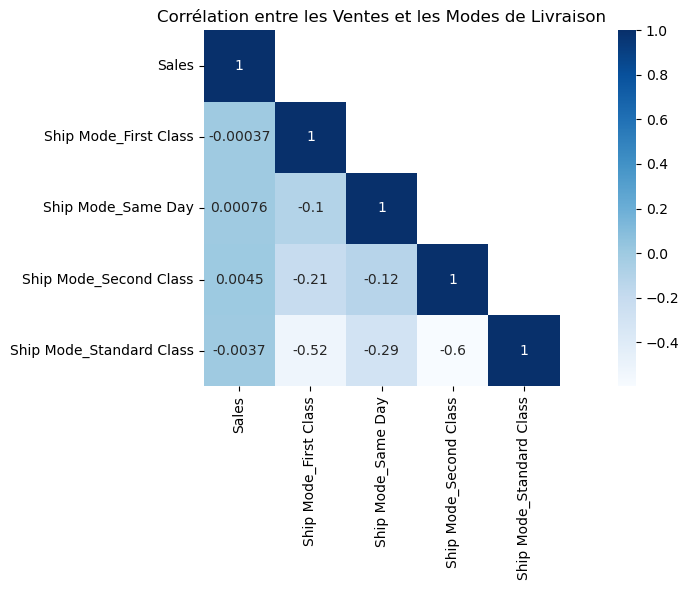

In [187]:
# Sélection des colonnes pertinentes pour la corrélation (Ship Mode et Sales)
df1 = df[['Ship Mode', 'Sales']]

# Convertir les variables catégorielles en variables numériques
df_cat = pd.get_dummies(df1)

# Calcul de la matrice de corrélation
cor_mat = df_cat.corr()

# Masquer la partie inférieure de la matrice
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False

# Visualisation de la corrélation avec une heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cmap='Blues', cbar=True)
plt.title('Corrélation entre les Ventes et les Modes de Livraison')
plt.tight_layout()
plt.show()

### Aucune des trois analyses de corrélation ne montre une relation forte entre les variables analysées et les ventes. Cela peut suggérer que d’autres facteurs (comme les prix, la saisonnalité ou la demande spécifique) ont probablement plus d’impact sur les ventes.

# 6. Analyse des tendances temporelles

In [172]:
# Importation du fichier CSV
df = pd.read_csv('/Users/helton/Downloads/train 2.csv')

df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [127]:
# Afficher les statistiques des données numériques
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [174]:
# Vérifier les types de données dans chaque colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [178]:
# Convertir les colonnes 'Order Date' et 'Ship Date' en format DateTime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

# Vérifier que la conversion a bien été effectuée
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [182]:
# Afficher la répartition des dates dans 'Order Date'
print('Order Date Description\n') 
print(df['Order Date'].describe())

# Afficher la répartition des dates dans 'Ship Date'
print('\nShip Date Description\n')
print(df['Ship Date'].describe())

Order Date Description

count                             9800
mean     2017-05-01 05:13:51.673469440
min                2015-01-03 00:00:00
25%                2016-05-24 00:00:00
50%                2017-06-26 00:00:00
75%                2018-05-15 00:00:00
max                2018-12-30 00:00:00
Name: Order Date, dtype: object

Ship Date Description

count                             9800
mean     2017-05-05 04:17:52.653061120
min                2015-01-07 00:00:00
25%                2016-05-27 18:00:00
50%                2017-06-29 00:00:00
75%                2018-05-19 00:00:00
max                2019-01-05 00:00:00
Name: Ship Date, dtype: object


#### Aucune anomalie évidente dans les dates.

### Trier les données par date de commande et définir l’index
L’objectif ici est de trier les données par Order Date de manière croissante et de définir Order Date comme l’index du DataFrame. Cela rendra l’analyse temporelle plus facile, car nous pourrons utiliser l’index pour manipuler les dates directement.

In [191]:
# Trier les données par la colonne 'Order Date' de manière croissante
df.sort_values(by=['Order Date'], inplace=True, ascending=True)

# Définir 'Order Date' comme index pour faciliter l'analyse des séries temporelles
df.set_index("Order Date", inplace=True)

# Vérifier les premières lignes pour s'assurer que l'index est bien défini
print(df.head())

            Row ID        Order ID  Ship Date       Ship Mode Customer ID  \
Order Date                                                                  
2015-01-03    7981  CA-2015-103800 2015-01-07  Standard Class    DP-13000   
2015-01-04     742  CA-2015-112326 2015-01-08  Standard Class    PO-19195   
2015-01-04     741  CA-2015-112326 2015-01-08  Standard Class    PO-19195   
2015-01-04     740  CA-2015-112326 2015-01-08  Standard Class    PO-19195   
2015-01-05    1760  CA-2015-141817 2015-01-12  Standard Class    MB-18085   

            Customer Name      Segment        Country          City  \
Order Date                                                            
2015-01-03  Darren Powers     Consumer  United States       Houston   
2015-01-04  Phillina Ober  Home Office  United States    Naperville   
2015-01-04  Phillina Ober  Home Office  United States    Naperville   
2015-01-04  Phillina Ober  Home Office  United States    Naperville   
2015-01-05     Mick Brown     Cons

### Préparer les données pour les prévisions

L’objectif ici est de créer un nouveau DataFrame avec uniquement la colonne Sales et Order Date comme index. Cela nous permettra de nous concentrer sur l’analyse des ventes au fil du temps et de préparer les données pour les prévisions futures.


In [196]:
# Créer un nouveau DataFrame avec seulement les colonnes 'Sales' et 'Order Date' comme index
new_data = pd.DataFrame(df['Sales'])

# Afficher les premières lignes pour vérifier
print(new_data.head())

              Sales
Order Date         
2015-01-03   16.448
2015-01-04    3.540
2015-01-04  272.736
2015-01-04   11.784
2015-01-05   19.536


### Visualisation de la distribution des ventes

L’objectif ici est de visualiser la distribution des ventes sur la période de 2015 à 2018, pour mieux comprendre l’évolution des ventes au fil du temps.

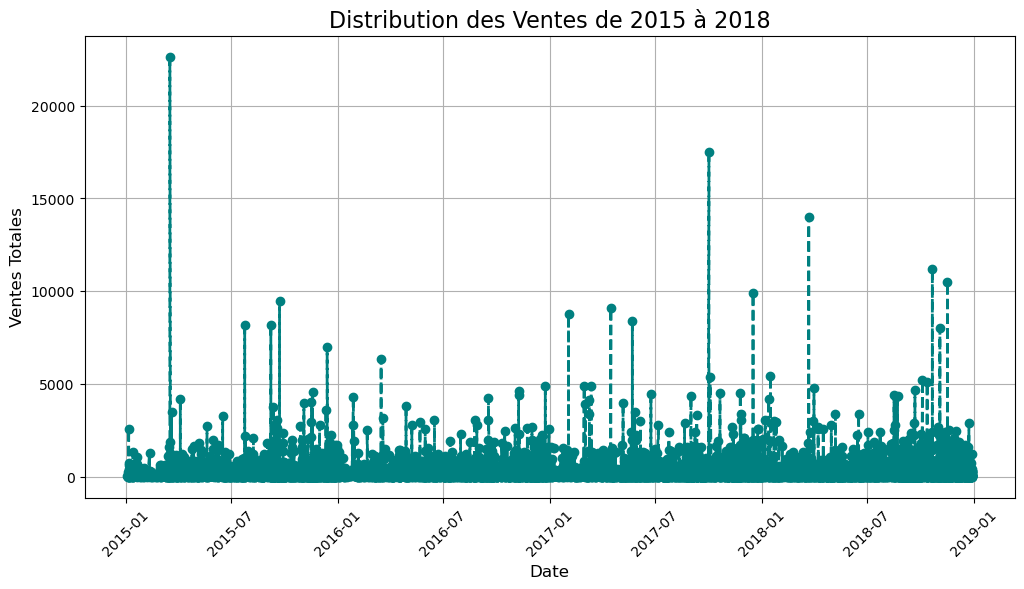

In [204]:
# Tracer la distribution des ventes sur la période de 2015 à 2018
plt.figure(figsize=(12, 6))
plt.plot(new_data, color='teal', linestyle='--', marker='o', linewidth=2)  # Changer la couleur et le style
plt.title('Distribution des Ventes de 2015 à 2018', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Ventes Totales', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Vérification de la stationnarité des données

Objectif : nous allons utiliser des tests de stationnarité pour vérifier si la série temporelle des ventes est stationnaire ou non.


In [208]:
# Resampler les données pour obtenir des moyennes quotidiennes
new_data = pd.DataFrame(df['Sales'].resample('D').mean())

# Interpolation linéaire pour combler les valeurs manquantes
new_data = new_data.interpolate(method='linear')

# Afficher les premières lignes pour vérifier
print(new_data.head())

                 Sales
Order Date            
2015-01-03   16.448000
2015-01-04   96.020000
2015-01-05   19.536000
2015-01-06  489.677778
2015-01-07   43.579000


In [210]:
# Importation du test Augmented Dickey-Fuller (ADF)
from statsmodels.tsa.stattools import adfuller 

# Exécution du test ADF sur la série temporelle
adf = adfuller(new_data)

# Affichage des résultats
print(adf)
print('\nADF Statistic: ', str(adf[0]))  # Plus cette valeur est négative, mieux c'est
print('\np-value: ', str(adf[1]))
print('\nCritical Values: ')

# Affichage des valeurs critiques pour 1%, 5% et 10%
for key, val in adf[4].items():
    print(key, ':', val)

    # Vérification si la statistique ADF est plus petite que les valeurs critiques
    if adf[0] < val:
        print('Hypothèse nulle rejetée. La série est stationnaire.')
    else:
        print('Hypothèse nulle acceptée. La série n\'est pas stationnaire.')

(-20.80945851483935, 0.0, 2, 1455, {'1%': -3.4348523191002123, '5%': -2.8635284734563364, '10%': -2.567828646449617}, 20042.15494613892)

ADF Statistic:  -20.80945851483935

p-value:  0.0

Critical Values: 
1% : -3.4348523191002123
Hypothèse nulle rejetée. La série est stationnaire.
5% : -2.8635284734563364
Hypothèse nulle rejetée. La série est stationnaire.
10% : -2.567828646449617
Hypothèse nulle rejetée. La série est stationnaire.


#### Conclusion :
La série est stationnaire. Nous avons rejeté l’hypothèse nulle, ce qui signifie que les ventes sont relativement constantes au fil du temps sans tendances ni variations saisonnières importantes.


### Analyser les tendances et la saisonnalité des ventes

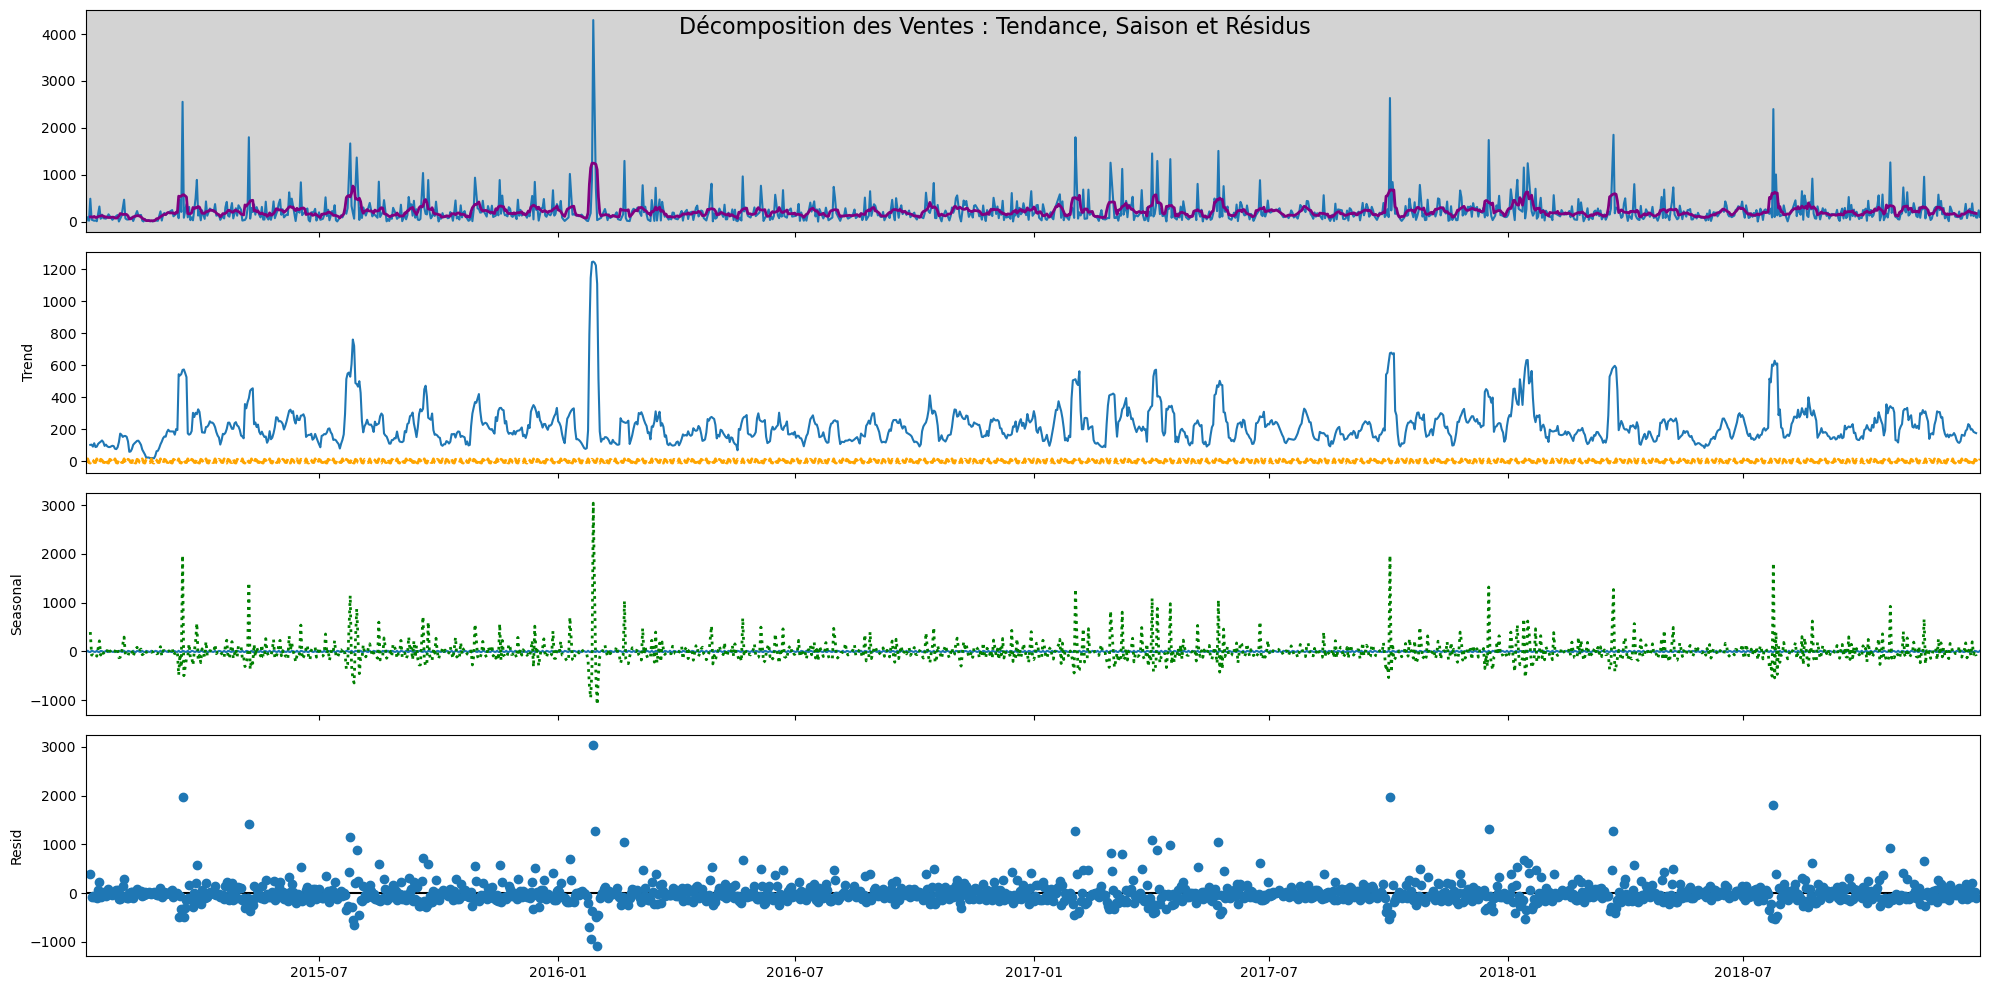

In [222]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10  # Taille du graphique

import statsmodels.api as sm

# Décomposer la série temporelle en tendance, saisonnalité et résidus
decomposition = sm.tsa.seasonal_decompose(new_data, model='additive')

# Afficher la décomposition
fig = decomposition.plot()

# Personnaliser les couleurs
fig.axes[0].set_facecolor('lightgrey')  # Changer la couleur de fond de la figure
fig.axes[0].plot(decomposition.trend, color='purple', linestyle='-', linewidth=2)  # Couleur pour la tendance
fig.axes[1].plot(decomposition.seasonal, color='orange', linestyle='--', linewidth=2)  # Couleur pour la saisonnalité
fig.axes[2].plot(decomposition.resid, color='green', linestyle=':', linewidth=2)  # Couleur pour les résidus

# Ajouter un titre et des labels
fig.suptitle('Décomposition des Ventes : Tendance, Saison et Résidus', fontsize=16)
plt.show()

## Utilisation de SARIMA pour la prévision des ventes

In [9]:
import itertools

# Définir les valeurs possibles pour p, d, q
p = d = q = range(0, 2) 

# Créer toutes les combinaisons de paramètres de tendance (AR, I, MA)
pdq = list(itertools.product(p, d, q))

# Créer les combinaisons de paramètres saisonniers avec m=12 (période annuelle)
seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))] 

# Afficher quelques exemples de combinaisons de paramètres
print('Examples of parameter combinations for Seasonal ARIMA:')
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[1]))
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[2]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[3]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[4]))

Examples of parameter combinations for Seasonal ARIMA:
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


In [230]:
for parameters in pdq:  # Boucle pour tester différentes combinaisons de paramètres de tendance
    for seasonal_param in seasonal_pdq_comb:  # Boucle pour tester différentes combinaisons de paramètres saisonniers
        try:
            # Créer et entraîner le modèle SARIMA
            mod = sm.tsa.statespace.SARIMAX(new_data,
                                            order=parameters,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            # Entraîner le modèle et obtenir le AIC
            results = mod.fit()
            
            # Afficher les résultats (paramètres et AIC)
            print('SARIMA{}x{}12 - AIC:{}'.format(parameters, seasonal_param, results.aic))
        
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26774D+00    |proj g|=  1.96394D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.964D-06   7.268D+00
  F =   7.2677367694389359     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:21194.720419683938
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variab

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.92996D+00    |proj g|=  7.76304D-03

At iterate   10    f=  6.92994D+00    |proj g|=  1.28031D-02

At iterate   15    f=  6.92776D+00    |proj g|=  1.88415D-01

At iterate   20    f=  6.91196D+00    |proj g|=  1.72578D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     24     31      1     0     0   1.073D-07   6.912D+00
  F =   6.9119294729478069     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:20159.186343115805
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.97227D+00    |proj g|=  5.44029D-04

At iterate   15    f=  6.97226D+00    |proj g|=  3.83898D-02

At iterate   20    f=  6.97131D+00    |proj g|=  3.88619D-01

At iterate   25    f=  6.96884D+00    |proj g|=  9.51264D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     44      1     0     0   1.471D-05   6.969D+00
  F =   6.9688316198126525     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:20327.113003373695
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.92748D+00    |proj g|=  2.85869D-02

At iterate   10    f=  6.92720D+00    |proj g|=  8.67824D-04

At iterate   15    f=  6.92701D+00    |proj g|=  2.44664D-02

At iterate   20    f=  6.91959D+00    |proj g|=  2.33894D-01

At iterate   25    f=  6.91115D+00    |proj g|=  1.14533D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     32      1     0     0   1.210D-05   6.911D+00
  F =   6.9111510257176194     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:20158.916390992577
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.08709D+00    |proj g|=  4.93793D-04

At iterate   10    f=  7.08692D+00    |proj g|=  1.99716D-02

At iterate   15    f=  7.08313D+00    |proj g|=  5.25489D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     24      1     0     0   1.116D-07   7.082D+00
  F =   7.0821620513573498     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:20657.58454175803
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.98689D+00    |proj g|=  2.55751D-02

At iterate   10    f=  6.98670D+00    |proj g|=  7.65727D-03

At iterate   15    f=  6.97588D+00    |proj g|=  1.71780D-01

At iterate   20    f=  6.89267D+00    |proj g|=  1.05796D-01

At iterate   25    f=  6.88712D+00    |proj g|=  3.62975D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     35      1     0     0   1.503D-06   6.887D+00
  F =   6.8871245175617224     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:20088.855093209982
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     21      1     0     0   6.019D-06   7.079D+00
  F =   7.0786119876576432     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:20647.232556009687
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08367D+00    |proj g|=  1.73668D+00

At iterate    5    f=  6.99182D+00    |proj g|=  1.34028D-01

At iterate   10    f=  6.98829D+00    |proj g|=  5.61801D-02

At iterate  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41     66      1     0     0   1.120D-03   6.944D+00
  F =   6.9439554520875229     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:20256.574098287216
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09511D+00    |proj g|=  1.69519D-02

At iterate    5    f=  7.09493D+00    |proj g|=  4.21958D-03

At iterate   10    f=  7.09274D+00    |proj g|=  6.17296D-02

At iterate  

 This problem is unconstrained.



At iterate    5    f=  6.98727D+00    |proj g|=  3.04096D-02

At iterate   10    f=  6.98629D+00    |proj g|=  1.30905D-03

At iterate   15    f=  6.98589D+00    |proj g|=  1.75036D-02

At iterate   20    f=  6.94308D+00    |proj g|=  2.18018D-01

At iterate   25    f=  6.88856D+00    |proj g|=  5.47737D-02

At iterate   30    f=  6.88644D+00    |proj g|=  2.32276D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     58      1     0     0   2.323D-05   6.886D+00
  F =   6.8864407748861858     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:20088.8612995


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.17003D+00    |proj g|=  6.12843D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     15      1     0     0   6.128D-09   7.170D+00
  F =   7.1700266534878061     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:20911.79772157044
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.52839D+00    |proj g|=  1.97815D-05

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.16978D+00    |proj g|=  1.12826D-02

At iterate   10    f=  7.16976D+00    |proj g|=  5.09239D-03

At iterate   15    f=  7.16911D+00    |proj g|=  1.05551D-01

At iterate   20    f=  7.13750D+00    |proj g|=  2.16763D-01

At iterate   25    f=  7.12807D+00    |proj g|=  4.56931D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     28     35      1     0     0   9.018D-07   7.128D+00
  F =   7.1280616322490653     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:20789.427719638275
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.16983D+00    |proj g|=  7.40962D-05

At iterate   10    f=  7.16983D+00    |proj g|=  5.39205D-04

At iterate   15    f=  7.16978D+00    |proj g|=  1.48292D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     25      1     0     0   6.800D-05   7.170D+00
  F =   7.1697727458827156     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:20913.057326994
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  7.15174D+00    |proj g|=  5.86949D-02

At iterate   10    f=  7.15153D+00    |proj g|=  9.64177D-03

At iterate   15    f=  7.14961D+00    |proj g|=  1.73736D-01

At iterate   20    f=  7.13250D+00    |proj g|=  1.56794D-01

At iterate   25    f=  7.12746D+00    |proj g|=  2.99189D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     37      1     0     0   3.988D-06   7.127D+00
  F =   7.1274553401047704     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:20789.65977174551
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.00504D+00    |proj g|=  2.04175D-01

At iterate   20    f=  6.99937D+00    |proj g|=  2.11759D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     24     41      1     0     0   1.120D-05   6.999D+00
  F =   6.9990118487483173     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:20413.118550950094
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.00639D+00    |proj g|=  1.76860D-01

At iterate  

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     22      1     1     0   1.194D-03   7.312D+00
  F =   7.3122870162773665     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:21326.6289394648
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09750D+00    |proj g|=  1.40993D-01

At iterate    5    f=  7.05073D+00    |proj g|=  4.06161D-02

At iterate   10    f=  7.05043D+00    |proj g|=  2.97475D-03

At iterate   1

 This problem is unconstrained.



At iterate   15    f=  6.95520D+00    |proj g|=  1.12494D-01

At iterate   20    f=  6.95203D+00    |proj g|=  1.32081D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     41      1     0     0   6.601D-07   6.952D+00
  F =   6.9520114114032259     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:20278.065275651807
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.00634D+00    |proj g|=  1.76832D-01


 This problem is unconstrained.



At iterate    5    f=  6.94922D+00    |proj g|=  1.40644D-02

At iterate   10    f=  6.94917D+00    |proj g|=  2.62993D-03

At iterate   15    f=  6.94916D+00    |proj g|=  4.40788D-02

At iterate   20    f=  6.94902D+00    |proj g|=  3.94498D-02

At iterate   25    f=  6.94900D+00    |proj g|=  5.07092D-03

At iterate   30    f=  6.94896D+00    |proj g|=  5.92143D-02

At iterate   35    f=  6.94726D+00    |proj g|=  9.34205D-02

At iterate   40    f=  6.94332D+00    |proj g|=  8.76857D-02

At iterate   45    f=  6.94291D+00    |proj g|=  3.19363D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     45     67   

 This problem is unconstrained.


  ys=-1.761E-02  -gs= 6.625E-03 BFGS update SKIPPED

At iterate    5    f=  7.14363D+00    |proj g|=  5.32172D-02

At iterate   10    f=  7.14328D+00    |proj g|=  1.76561D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     26      1     1     0   9.201D-04   7.143D+00
  F =   7.1432764579606696     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:20835.794151413313
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= 

 This problem is unconstrained.



At iterate    5    f=  7.05361D+00    |proj g|=  4.28596D-02

At iterate   10    f=  7.04981D+00    |proj g|=  5.47561D-03

At iterate   15    f=  7.04977D+00    |proj g|=  7.64740D-03

At iterate   20    f=  7.04660D+00    |proj g|=  7.62635D-02

At iterate   25    f=  7.02231D+00    |proj g|=  1.54658D-01

At iterate   30    f=  6.90605D+00    |proj g|=  5.54546D-02

At iterate   35    f=  6.90524D+00    |proj g|=  1.44798D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     55      1     0     0   7.125D-06   6.905D+00
  F =   6.9052410424149775     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:20706.93152774898
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.04302D+00    |proj g|=  8.32025D-02

At iterate    5    f=  7.03983D+00    |proj g|=  1.01411D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      9      1     0     0   1.014D-05   7.040D+00
  F =   7.0398260166907312     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:20534.13266467017
RUNNING THE L-BFGS-B

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.96053D+00    |proj g|=  1.04070D-01

At iterate   10    f=  6.95709D+00    |proj g|=  3.35105D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     20      1     0     0   6.725D-04   6.957D+00
  F =   6.9570906717158243     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:20294.876398723343
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08701D+00    |proj g|=  5.55234D-03

At iterate  

 This problem is unconstrained.



At iterate   10    f=  7.08418D+00    |proj g|=  7.04465D-02

At iterate   15    f=  7.06187D+00    |proj g|=  3.59638D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   2.255D-06   7.062D+00
  F =   7.0618606367588255     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:20598.385616788735
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.02040D+00    |proj g|=  1.25442D-01


 This problem is unconstrained.



At iterate    5    f=  6.98911D+00    |proj g|=  3.18348D-02

At iterate   10    f=  6.98805D+00    |proj g|=  2.20939D-03

At iterate   15    f=  6.98498D+00    |proj g|=  4.69650D-02

At iterate   20    f=  6.90913D+00    |proj g|=  1.32960D-01

At iterate   25    f=  6.88774D+00    |proj g|=  2.86102D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     40      1     0     0   1.856D-07   6.888D+00
  F =   6.8877187861575564     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:20092.587980435434
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99113D+00    |proj g|=  7.34719D-02

At iterate    5    f=  6.95925D+00    |proj g|=  2.98442D+00
  ys=-3.184E-03  -gs= 5.426E-03 BFGS update SKIPPED

At iterate   10    f=  6.95159D+00    |proj g|=  3.57146D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   15    f=  6.95044D+00    |proj g|=  2.25909D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     75      2     1     0   2.259D-02   6.950D+00
  F =   6.9504395013491322     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:20275.48158593407
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28346D+00    |proj g|=  8.52325D-04

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.98384D+00    |proj g|=  2.93591D-02

At iterate   10    f=  6.98366D+00    |proj g|=  7.37918D-03

At iterate   15    f=  6.98341D+00    |proj g|=  4.82298D-03

At iterate   20    f=  6.97702D+00    |proj g|=  7.74872D-02

At iterate   25    f=  6.89545D+00    |proj g|=  1.86714D-01

At iterate   30    f=  6.88327D+00    |proj g|=  4.28313D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     45      1     0     0   2.977D-06   6.883D+00
  F =   6.8832713722633088     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:20079.6193215

 This problem is unconstrained.



At iterate   10    f=  6.95563D+00    |proj g|=  4.82537D-01

At iterate   15    f=  6.95494D+00    |proj g|=  7.56039D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     67      1     0     0   7.004D-03   6.955D+00
  F =   6.9549413106318516     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:20288.60886180248
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99173D+00    |proj g|=  2.63579D-01

At iterate   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  6.95206D+00    |proj g|=  4.25515D-02

At iterate   15    f=  6.95199D+00    |proj g|=  8.27348D-02

At iterate   20    f=  6.94686D+00    |proj g|=  2.80662D-01

At iterate   25    f=  6.94575D+00    |proj g|=  7.58411D-02

At iterate   30    f=  6.94571D+00    |proj g|=  1.09103D-03

At iterate   35    f=  6.94561D+00    |proj g|=  8.60365D-02

At iterate   40    f=  6.94016D+00    |proj g|=  2.25482D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     56      1     0     0   3.589D-04   6.940D+00
  F =   6.9400291052975271     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  7.08666D+00    |proj g|=  3.40409D-03

At iterate   15    f=  7.08517D+00    |proj g|=  4.15785D-02

At iterate   20    f=  7.06207D+00    |proj g|=  2.74435D-02

At iterate   25    f=  7.06131D+00    |proj g|=  3.00025D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     30      1     0     0   2.350D-07   7.061D+00
  F =   7.0613067835552572     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:20598.77058084713
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X

 This problem is unconstrained.



At iterate    5    f=  6.98425D+00    |proj g|=  3.18076D-02

At iterate   10    f=  6.98317D+00    |proj g|=  2.29835D-03

At iterate   15    f=  6.98295D+00    |proj g|=  3.12307D-03

At iterate   20    f=  6.97803D+00    |proj g|=  4.33175D-02

At iterate   25    f=  6.95848D+00    |proj g|=  1.41201D-01

At iterate   30    f=  6.91458D+00    |proj g|=  1.84382D-02

At iterate   35    f=  6.90205D+00    |proj g|=  8.04196D-02

At iterate   40    f=  6.88373D+00    |proj g|=  4.65953D-02

At iterate   45    f=  6.88251D+00    |proj g|=  5.95512D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     84   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.13592D+00    |proj g|=  4.25016D-02

At iterate   10    f=  7.13557D+00    |proj g|=  1.58669D-03

At iterate   15    f=  7.13526D+00    |proj g|=  1.70495D-02

At iterate   20    f=  7.10419D+00    |proj g|=  1.96784D-01

At iterate   25    f=  7.03297D+00    |proj g|=  1.04442D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     37      1     0     0   8.691D-07   7.033D+00
  F =   7.0329708701548919     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:20514.143057371664
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.23250D+00    |proj g|=  3.77571D-03

At iterate   10    f=  7.23087D+00    |proj g|=  5.45145D-02

At iterate   15    f=  7.20594D+00    |proj g|=  1.88390D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   7.578D-07   7.206D+00
  F =   7.2057190933159072     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:21017.876876109185
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate  

 This problem is unconstrained.



At iterate    5    f=  7.13907D+00    |proj g|=  5.48735D-02

At iterate   10    f=  7.13485D+00    |proj g|=  1.13530D-03

At iterate   15    f=  7.12559D+00    |proj g|=  1.36102D-01

At iterate   20    f=  7.03478D+00    |proj g|=  7.00674D-02

At iterate   25    f=  7.03178D+00    |proj g|=  1.00556D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     40      1     0     0   1.040D-05   7.032D+00
  F =   7.0317781204577932     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:20512.664999254925
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.98679D+00    |proj g|=  1.37036D-01

At iterate   10    f=  6.98607D+00    |proj g|=  6.49238D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     20      1     0     0   6.492D-04   6.986D+00
  F =   6.9860653261600403     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:20377.366491082677
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99456D+00    |proj g|=  2.08736D-01

At iterate  

 This problem is unconstrained.



At iterate   10    f=  7.29134D+00    |proj g|=  4.47895D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     20      1     1     0   4.479D-04   7.291D+00
  F =   7.2913425155041462     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:21267.55477521009
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08597D+00    |proj g|=  1.35988D-01


 This problem is unconstrained.



At iterate    5    f=  7.04092D+00    |proj g|=  7.46139D-02

At iterate   10    f=  7.03964D+00    |proj g|=  8.16956D-03

At iterate   15    f=  7.03954D+00    |proj g|=  1.23465D-02

At iterate   20    f=  7.03446D+00    |proj g|=  2.04857D-01

At iterate   25    f=  6.90466D+00    |proj g|=  1.71038D-01

At iterate   30    f=  6.88317D+00    |proj g|=  1.78611D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     51      1     0     0   9.171D-05   6.883D+00
  F =   6.8831344864983306     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:20079.2201626

 This problem is unconstrained.



At iterate    5    f=  6.93584D+00    |proj g|=  1.22595D-01

At iterate   10    f=  6.93446D+00    |proj g|=  1.46678D-03

At iterate   15    f=  6.93442D+00    |proj g|=  5.29780D-03

At iterate   20    f=  6.93190D+00    |proj g|=  1.16528D-01

At iterate   25    f=  6.92450D+00    |proj g|=  2.99434D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     37      1     0     0   1.878D-05   6.924D+00
  F =   6.9244968541659020     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:20199.83282674777
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.



At iterate    5    f=  6.93144D+00    |proj g|=  1.24086D-01

At iterate   10    f=  6.92993D+00    |proj g|=  3.12414D-02

At iterate   15    f=  6.92992D+00    |proj g|=  7.50820D-03

At iterate   20    f=  6.92986D+00    |proj g|=  7.50072D-02

At iterate   25    f=  6.92968D+00    |proj g|=  2.05872D-03

At iterate   30    f=  6.92968D+00    |proj g|=  1.57510D-02

At iterate   35    f=  6.92946D+00    |proj g|=  6.79683D-02

At iterate   40    f=  6.92543D+00    |proj g|=  1.22354D-01

At iterate   45    f=  6.91996D+00    |proj g|=  2.59079D-02

At iterate   50    f=  6.91993D+00    |proj g|=  4.95872D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:20188.515792941613
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.16223D+00    |proj g|=  1.51710D-01
  ys=-1.472E-02  -gs= 1.905E-02 BFGS update SKIPPED

At iterate    5    f=  7.12240D+00    |proj g|=  1.57463D-01

At iterate   10    f=  7.12158D+00    |proj g|=  2.23863D-03

At iterate   15    f=  7.12158D+00    |proj g|=  2.08693D-03

At iterate   20    f=  7.12157D+00    |proj g|=  3.74938D-02

At iterate   25    f=  7.12054D+00    |proj g|=  3.17422D-01

At iterate   30    f=  7.11467D+00    |proj g|=  9.82745D-02

At iterate   35    f=  7.06299D+00    |proj g|=  3.87077D-01

At iterate   40    f=  7.05935D+00    |proj g|=  2.01591D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Sk

 This problem is unconstrained.



At iterate    5    f=  7.05849D+00    |proj g|=  3.17557D-01

At iterate   10    f=  7.03992D+00    |proj g|=  1.05022D-01

At iterate   15    f=  7.03911D+00    |proj g|=  2.50904D-03

At iterate   20    f=  7.03904D+00    |proj g|=  9.95591D-03

At iterate   25    f=  7.03590D+00    |proj g|=  4.29737D-01

At iterate   30    f=  6.94090D+00    |proj g|=  2.85148D-01

At iterate   35    f=  6.88312D+00    |proj g|=  1.10917D-01

At iterate   40    f=  6.88243D+00    |proj g|=  2.96678D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     64      1     0     0   1.316D-05   6.882D+00
  F =   6.88243071219

In [232]:
# Entraîner le modèle SARIMA avec les paramètres sélectionnés
mod = sm.tsa.statespace.SARIMAX(new_data,
                                order=(1, 1, 1),  # Paramètres de tendance (p, d, q)
                                seasonal_order=(1, 1, 1, 12),  # Paramètres saisonniers (P, D, Q, m)
                                enforce_stationarity=False,
                                enforce_invertibility=False)  # Définition du modèle

# Ajuster le modèle aux données
results = mod.fit()

# Afficher les résultats du modèle ajusté
print(results.summary().tables[1])  # Afficher les résultats de la deuxième table (paramètres ajustés)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.11716D+00    |proj g|=  1.38132D-01

At iterate    5    f=  7.05849D+00    |proj g|=  3.17557D-01

At iterate   10    f=  7.03992D+00    |proj g|=  1.05022D-01

At iterate   15    f=  7.03911D+00    |proj g|=  2.50904D-03

At iterate   20    f=  7.03904D+00    |proj g|=  9.95591D-03

At iterate   25    f=  7.03590D+00    |proj g|=  4.29737D-01

At iterate   30    f=  6.94090D+00    |proj g|=  2.85148D-01

At iterate   35    f=  6.88312D+00    |proj g|=  1.10917D-01

At iterate   40    f=  6.88243D+00    |proj g|=  2.96678D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

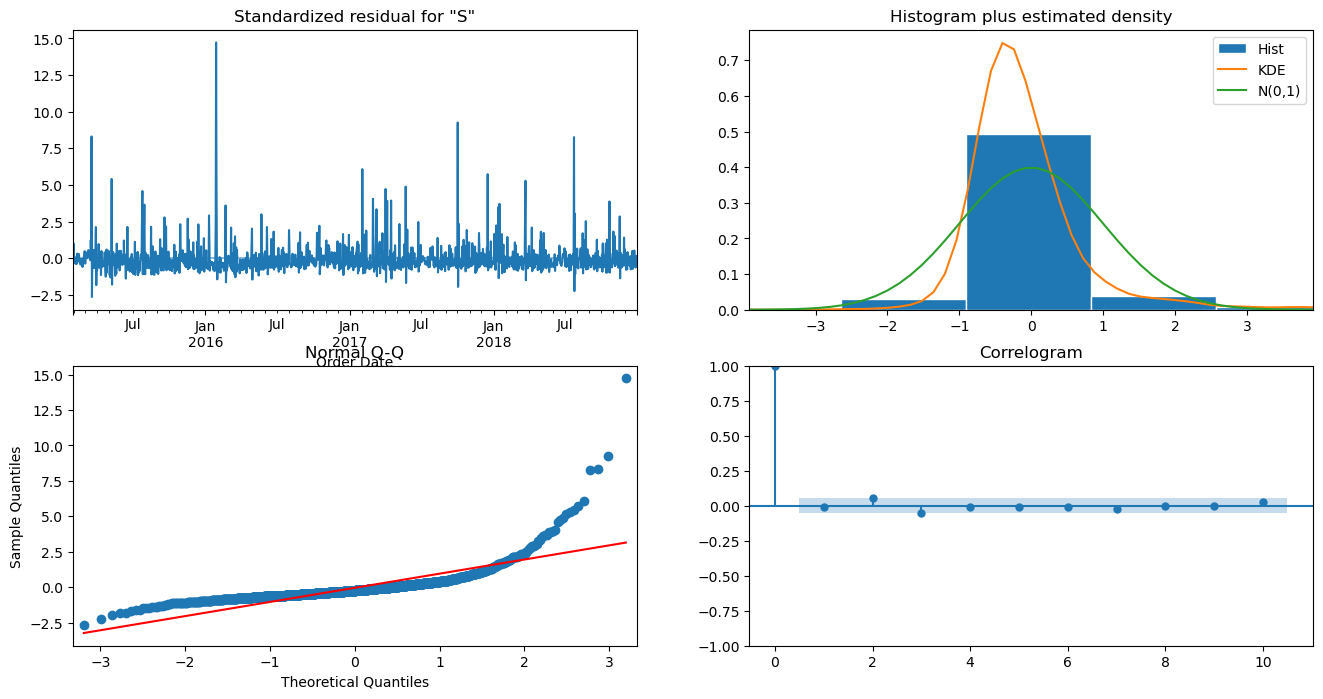

In [254]:
# Afficher les diagnostics du modèle SARIMA
results.plot_diagnostics(figsize=(16, 8))

# Afficher le graphique
plt.show()

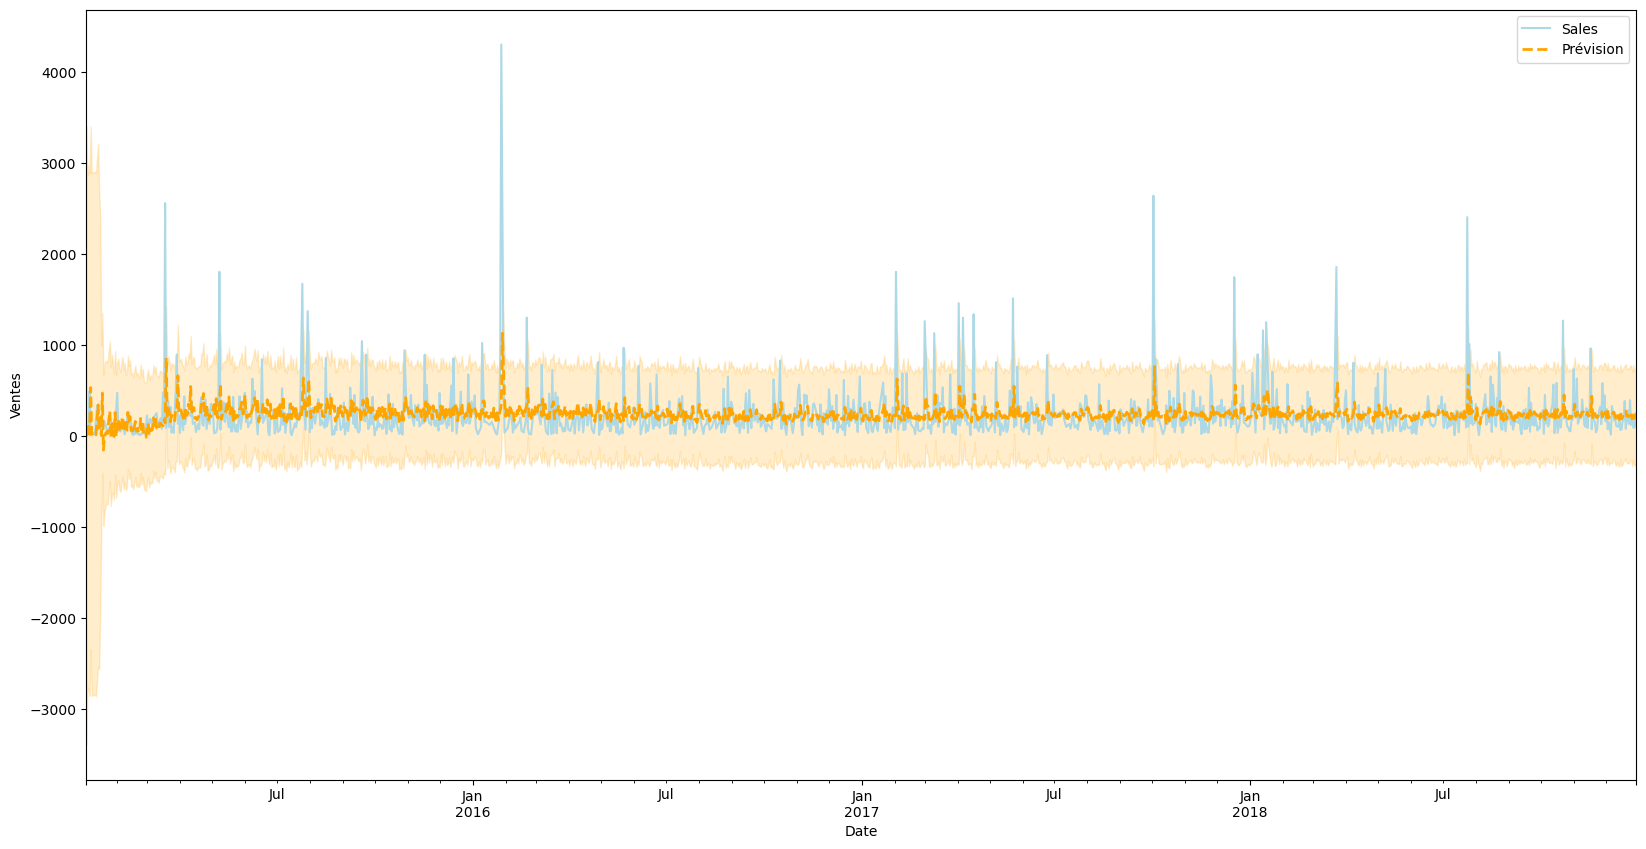

In [262]:
# Prédiction des ventes avec le modèle ajusté
pred = results.get_prediction(start=pd.to_datetime('2015-01-03'), dynamic=False)

# Intervalle de confiance des prévisions
pred_val = pred.conf_int()

# Tracer les données réelles et les prévisions
ax = new_data['2014':].plot(label='Observé', color='lightblue')  # Données réelles en bleu clair
pred.predicted_mean.plot(ax=ax, label='Prévision', color='orange', linestyle='--', linewidth=2)  # Prévisions en orange

# Ajouter les intervalles de confiance
ax.fill_between(pred_val.index, pred_val.iloc[:, 0], pred_val.iloc[:, 1], color='orange', alpha=0.2)

# Ajouter des labels et une légende
ax.set_xlabel('Date')
ax.set_ylabel('Ventes')
plt.legend()
plt.show()

In [264]:
# Récupérer les prévisions et les vraies ventes
y_forecasted = pred.predicted_mean
y_truth = new_data['Sales']

# Calculer l'erreur quadratique moyenne (RMSE)
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_forecasted, y_truth)  # Calcul du MSE
rmse = sqrt(mse)  # Prendre la racine carrée pour obtenir le RMSE

# Afficher le RMSE
print('L\'erreur quadratique moyenne (RMSE) des prévisions est :', round(rmse, 2))

L'erreur quadratique moyenne (RMSE) des prévisions est : 267.66


In [266]:
# Faire une prévision des ventes pour les 7 prochains jours
forecast = results.forecast(steps=7)

# Afficher les prévisions sous forme d'entiers
print(forecast.astype('int'))

2018-12-31    229
2019-01-01    241
2019-01-02    244
2019-01-03    229
2019-01-04    196
2019-01-05    254
2019-01-06    223
Freq: D, Name: predicted_mean, dtype: int64


### Analyse de ces prévisions :
-Les prévisions montrent des fluctuations quotidiennes dans les ventes, ce qui est normal pour une série temporelle basée sur des données de ventes.

-Il y a une baisse légère au 2019-01-04, suivie d’un pic de ventes à 254 le 2019-01-05.

## Conclusion
Pour résumer :
- J’ai identifié les produits, villes, clients et catégories les plus rentables.
- J’ai mis en évidence les périodes fortes dans l’année.
- Et j’ai aussi montré qu’on pouvait prédire les ventes sur quelques jours.

En analysant les données, j’ai retenu trois choses principales : 

- Les clients particuliers (Consumer) sont les plus rentables.
- La Californie et New York sont les zones où on vend le plus.
- Les produits tech comme les téléphones sont ceux qui génèrent le plus de revenus.

Le mode de livraison “Standard” reste le plus utilisé et le plus rentable.

Enfin, grâce aux prévisions, on voit que les ventes vont rester stables dans les prochains jours, ce qui peut aider à mieux anticiper les besoins.